# Random Operators: random quantum states and channels

In this notebook we explore a submodule of `operator_tools` called `random_operators`.

In the context of forest benchmarking the primary use of random operators is to test the estimation routines. For example you might modify an existing state or process tomography routine (or develop a new method) and want to test that your modification works. One way to do that would be to test it on a bunch of random quantum states or channels. 

In [1]:
import numpy as np
import forest.benchmarking.operator_tools.random_operators as rand_ops

## Random Operators

### Complex Ginibre ensemble

This is a subroutine for other methods in the module. The complex Ginibre ensemble is a random matrix where the real and imaginary parts of each entry, $G(n,m)$, are drawn in an IID fashion from $\mathcal N(0,1)$ e.g.

$$G(n,m) = X(n,m) + i Y(n,m)$$

where $X(n,m), Y(n,m)\sim \mathcal N(0,1)$. For our purpose we allow for non square matricies.

In [2]:
gini_2by2 = rand_ops.ginibre_matrix_complex(2,2)
print(np.round(gini_2by2,3))

print('Notice that the above matrix is not Hermitian.')
print('We can explicitly test if it is Hermitian: ', np.all(gini_2by2.T.conj()==gini_2by2))

[[ 0.454+2.894j -0.11 +0.884j]
 [-0.843+0.807j  1.524+0.432j]]
Notice that the above matrix is not Hermitian.
We can explicitly test if it is Hermitian:  False


### Haar random unitary

Here you simply specify the dimesion of the Hilbert space. 

In [3]:
U = rand_ops.haar_rand_unitary(2)
print(U)

[[-0.78341257-0.49222843j  0.3751708 +0.0567696j ]
 [ 0.36230524+0.11274234j  0.91971295-0.10075794j]]


We can test to see how close to unitary it is:

In [4]:
print(np.around(U.dot(np.transpose(np.conj(U))),decimals=15))
print(np.around(U.dot(np.transpose(np.conj(U))),decimals=16))

[[ 1.+0.j -0.-0.j]
 [-0.+0.j  1.+0.j]]
[[ 1.e+00+0.j -1.e-16-0.j]
 [-1.e-16+0.j  1.e+00+0.j]]


Apparently it is only good to 16 decimal places.

## Random States

### Haar random pure state

The simpliest random state is a state drawn from the Haar measure. It is a pure state, i.e. the purity is $P(\rho)={\rm Tr}[\rho^2]=1$. These states are generated by applying a Haar random unitary to a fixed fuduial state, usually $|0\ldots0\rangle$.

In [5]:
psi2 = rand_ops.haar_rand_state(2)
print('The state vector is \n', np.round(psi2,3))
print('It has shape', psi2.shape,'and purity P = ', np.real(np.round(np.trace(psi2@psi2.T.conj()@psi2@psi2.T.conj()),2)))
print('\n')
print('Now lets look at a random pure state on two qubits.')
psi4 = rand_ops.haar_rand_state(4)
print('The state vector is \n', np.round(psi4,3), )
print('It has shape', psi4.shape,'.')

The state vector is 
 [[ 0.075+0.445j]
 [-0.517+0.727j]]
It has shape (2, 1) and purity P =  1.0


Now lets look at a random pure state on two qubits.
The state vector is 
 [[ 0.028+0.036j]
 [-0.389+0.165j]
 [-0.251-0.162j]
 [-0.444+0.73j ]]
It has shape (4, 1) .


For fun lets plot the state in the Pauli representation.

In [6]:
from forest.benchmarking.plotting.state_process import plot_pauli_rep_of_state
from forest.benchmarking.operator_tools.superoperator_transformations import computational2pauli_basis_matrix, vec 
from forest.benchmarking.utils import n_qubit_pauli_basis
import matplotlib.pyplot as plt

# change of basis
n_qubits = 2
pl_basis_twoq = n_qubit_pauli_basis(n_qubits)
c2p_twoq = computational2pauli_basis_matrix(2*n_qubits)

# turn a state vector into a state matrix
rho = psi4@psi4.T.conj()
# convert the state to the Pauli representation which should be real
state = np.real(c2p_twoq@vec(rho))

fig, ax = plt.subplots()
plot_pauli_rep_of_state(state.transpose(), ax, pl_basis_twoq.labels, 'Random Two qubit state in Pauli representation')

### Ginibre State (mixed state with rank K)

This function lets us generate mixed states with a specific rank.

Specifically, given a Hilbert space dimension $D$ and a desired rank $K$, this function 
gives a D by D positive semidefinite matrix of rank $K$ drawn from the Ginibre ensemble. 
 
For $D = K$ these are states drawn from the **Hilbert-Schmidt measure**.

In [7]:
print('This is a mixed single qubit state drawn from Hilbert-Schmidt measure (as D=K)')
print(np.around(rand_ops.ginibre_state_matrix(2,2),3))
print("\n")
print('This is a mixed two qubit state with rank 2:')
print(np.around(rand_ops.ginibre_state_matrix(4,2),3))
evals, evec = np.linalg.eig(rand_ops.ginibre_state_matrix(4,2))
print('\n')
print('Here are the eigenvalues:', np.round(evals,3),'. You can see only two are non zero.')

This is a mixed single qubit state drawn from Hilbert-Schmidt measure (as D=K)
[[0.686+0.j    0.186+0.003j]
 [0.186-0.003j 0.314+0.j   ]]


This is a mixed two qubit state with rank 2:
[[0.09 +0.j    0.018-0.131j 0.112-0.04j  0.165+0.004j]
 [0.018+0.131j 0.327+0.j    0.103+0.041j 0.07 +0.21j ]
 [0.112+0.04j  0.103-0.041j 0.259+0.j    0.237+0.111j]
 [0.165-0.004j 0.07 -0.21j  0.237-0.111j 0.324+0.j   ]]


Here are the eigenvalues: [ 0.691-0.j  0.   -0.j  0.309+0.j -0.   +0.j] . You can see only two are non zero.


### State from Bures measure

In [8]:
np.round(rand_ops.bures_measure_state_matrix(2),4)

array([[0.0899-0.j    , 0.2775+0.0685j],
       [0.2775-0.0685j, 0.9101+0.j    ]])

## Random quantum Channels

### Uniform ensemble of CPTP maps (BCSZ distribution)

Given a Hilbert space dimension $D$ and a Kraus rank $K$, this function returns a $D^2 × D^2$ Choi matrix $J(Λ)$ of a channel drawn from the BCSZ distribution with Kraus rank $K$.

In [9]:
rand_choi = rand_ops.rand_map_with_BCSZ_dist(2,2)
print('Here is a random quantum channel on one qubit in Choi form:')
np.round(rand_choi,3)

Here is a random quantum channel on one qubit in Choi form:


array([[ 0.663+0.j   ,  0.315-0.303j,  0.288-0.049j, -0.192+0.511j],
       [ 0.315+0.303j,  0.337+0.j   ,  0.248+0.107j, -0.288+0.049j],
       [ 0.288+0.049j,  0.248-0.107j,  0.293+0.j   , -0.051+0.013j],
       [-0.192-0.511j, -0.288-0.049j, -0.051-0.013j,  0.707+0.j   ]])

In [10]:
rand_choi.shape

(4, 4)

To convert to different superoperator representations we import the module `operator_tools.superoperator_transformations`

In [11]:
import forest.benchmarking.operator_tools.superoperator_transformations as sot
print('We can convert this channel to Kraus form and enumerate the Kraus operators. We expect there to be two Kraus ops, consistent with the rank we specified.')

for idx, kraus_op in enumerate(sot.choi2kraus(rand_choi)):
    print('Kraus OP #'+str(1+idx)+' is: \n', np.round(kraus_op,3))

We can convert this channel to Kraus form and enumerate the Kraus operators. We expect there to be two Kraus ops, consistent with the rank we specified.
Kraus OP #1 is: 
 [[0.119+0.j    0.336-0.274j]
 [0.209-0.102j 0.42 +0.125j]]
Kraus OP #2 is: 
 [[-0.806+0.j    -0.308-0.101j]
 [-0.36 -0.391j  0.3  +0.652j]]


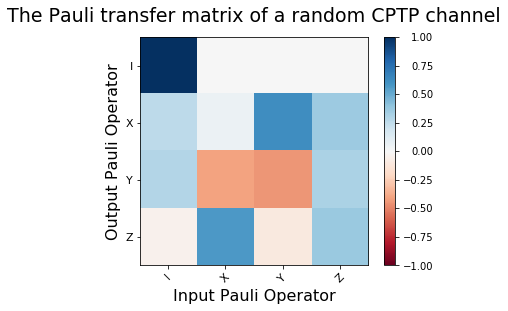

In [12]:
rand_pl = sot.choi2pauli_liouville(rand_choi)

from forest.benchmarking.plotting.state_process import plot_pauli_transfer_matrix
n_qubits = 1
pl_basis_oneq = n_qubit_pauli_basis(n_qubits)
c2p_oneq = computational2pauli_basis_matrix(2*n_qubits)

f, (ax1) = plt.subplots(1, 1, figsize=(5.5, 4.2))
plot_pauli_transfer_matrix(np.real(rand_pl), ax1, pl_basis_oneq.labels, 'The Pauli transfer matrix of a random CPTP channel')
plt.show()

## Permutations of operators on tensor product Hilbert spaces

In [13]:
# pick a hilbert space dimension
D = 2

Lets consider a tensor product of three Hilbert spaces: $$\mathcal H_a \otimes \mathcal H_b\otimes \mathcal H_c.$$ 

Next we need to pick a way you want to permute the operators; specified by a permutation in [cycle notation](https://en.wikipedia.org/wiki/Permutation#Cycle_notation). 

For example the Identity permutation is $P = [0,1,2]$ which maps $(a,b,c)$ to $(a,b,c)$.
The permutation $P = [1,2,0]$ maps $(a,b,c)$ to $(b,c,a)$, so lets try that.

In [14]:
perm =[1,2,0]
# Note: the number of elements in the permutation determines 
#       the number of Hilbert spaces you are considering.

Create the basis states in the Hilbert space

In [15]:
basis = list(range(0,D))
states = []
for jdx in basis:
    emptyvec = np.zeros((D,1))
    emptyvec[jdx] =1
    states.append(emptyvec)

Create inital state and answer after applying the permutation [1,2,0]

In [16]:
# before permuting anything
inital_vector = np.kron(np.kron(states[0],states[0]),states[1]) 

# apply the permutation by hand
perm_vector = np.kron(np.kron(states[0],states[1]),states[0]) 

**create permutation operator**

In [17]:
P_120 = rand_ops.permute_tensor_factors(D, perm)

**check the permutation operator applied to the intial vector gives the correct answer**

In [18]:
answer = np.matmul(P_120,inital_vector)

In [19]:
print('The inner product between the calculated and true answer is one', np.matmul(perm_vector.T,answer))

The inner product between the calculated and true answer is one [[1.]]
